<h1>Inferential statistics II - Bootsrapping</h1>

In [3]:
import pandas as pd
import numpy as np
from numpy.random import seed
import matplotlib.pyplot as plt

In [4]:
med_charges = pd.read_csv('data/insurance2.csv')

In [5]:
med_charges.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q:__ Use bootstrap sampling to estimate the same 95% confidence interval lower limit as before.

__A.__

In [6]:
np.random.seed(47)
N_rep = 10000

def bootstrap(data, func, size=1):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, size=len(data)))
    return bs_replicates

np.percentile(bootstrap(med_charges.charges, np.mean, N_rep), [5]) 

array([12724.4679217])

__Q:__ Calculate the 95% confidence interval for the difference between the standard deviations of insurance and non-insurance claim charges (insured - non-insured). Calculate the differences over 10000 replicates. Plot the histogram of values and mark the locations of the percentiles. State the null and alternative hypothesis and comment on whether you would retain or reject the null hypothesis in this case and why.

__A.__

In [7]:
insured = med_charges[med_charges['insuranceclaim'] == 1].charges
non_insured = med_charges[med_charges['insuranceclaim'] == 0].charges

In [8]:
def diff_std(data1, data2):
    return np.std(data1) - np.std(data2)

def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)
    
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, size=len(data)))
        
    return bs_replicates

def permutation_sample(data1, data2):
    data = np.concatenate((data1, data2))

    permuted_data = np.random.permutation(data)

    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    perm_replicates = np.empty(size)

    for i in range(size):
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

Insured: 14036.956250260417
Uninsured: 6440.699841605235
Real std difference: 7596.256408655182
95% confidence of bs std difference: [6808.43365792]


/usr/lib/python3/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


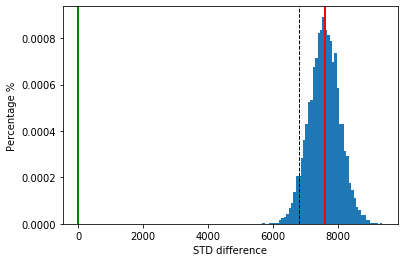

In [9]:
print("Insured:", np.std(insured))
print("Uninsured:", np.std(non_insured))

actual_diff = diff_std(insured, non_insured)
bs_ins_replicates = draw_bs_reps(insured, np.std, 10000)
bs_non_replicates = draw_bs_reps(non_insured, np.std, 10000)
bs_diff_replicates = bs_ins_replicates - bs_non_replicates


interval1 = np.percentile(bs_diff_replicates, [5])
print("Real std difference:", actual_diff)
print("95% confidence of bs std difference:", interval1)

plt.hist(bs_diff_replicates, bins=50, normed=True)
plt.axvline(interval1, color='k', linestyle='dashed', linewidth=1)
plt.axvline(actual_diff, color='r', linestyle='solid', linewidth=2)
plt.axvline(0, color='g', linestyle='solid', linewidth=2)
plt.xlabel("STD difference")
plt.ylabel('Percentage %')
plt.show()

h0: The null hypothesis is that the actual difference in standard deviations of the insured and non insured is 0

ha: The alternative hypothesis is that the real difference in standard deviations is greater  0

The null hypothesis is rejected because the 0 lies outside the 95% confidence interval of the bootstrapped data

__Q:__ Perform a bootstrapped hypothesis test at the 5% significance level ($\alpha = 0.05$) to calculate the p-value of the observed difference between insurance and non-insurance charges, state your null and alternative hypotheses and whether you retain or reject the null hypothesis for the given significance level.

__A:__

In [15]:
alpha = .05

bs_ins_replicates = draw_bs_reps(insured, np.std, 10000)
bs_non_replicates = draw_bs_reps(non_insured, np.std, 10000)
bs_diff_replicates = bs_ins_replicates - bs_non_replicates


interval1 = np.percentile(bs_diff_replicates, [5])
print("Real std difference:", actual_diff)
print("95% confidence of perm std difference", interval1)

p_value = np.sum(bs_diff_replicates <= 0)/len(bs_diff_replicates)
print("p-value= ", p_value)

if alpha > p_value:
    result = "rejected"
else:
    result = "retained"
    
print("The null hypothesis is", result)


Real std difference: 7596.256408655182
95% confidence of perm std difference [6839.13586592]
p-value=  0.0
The null hypothesis is rejected


h0: The null hypothesis is that the actual difference in standard deviations of the insured and non insured is 0

ha: The alternative hypothesis is that the real difference in standard deviations is greater  0

The null hypothesis is rejected because the p value is less than the significance level we implemented

__Q:__ To put the above result in perspective, plot the histogram of your bootstrapped differences along with lines marking the locations of the observed difference. (Why would we plot more than one line, given that we only have one observed difference?)

__A:__

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


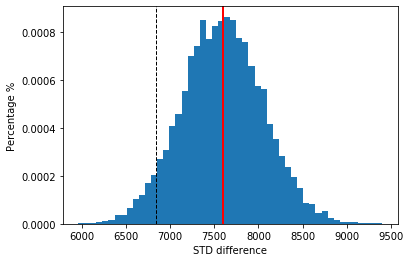

In [20]:
plt.hist(bs_diff_replicates, bins=50, normed=True)
plt.axvline(interval1, color='k', linestyle='dashed', linewidth=1)
plt.axvline(actual_diff, color='r', linestyle='solid', linewidth=2)
plt.xlabel("STD difference")
plt.ylabel('Percentage %')
plt.show()

__Q:__ Compare your p-value above with that obtained using the _t_-test function in the previous assignment. Do you think you would want to try to perform enough bootstrap replicates to observe a random difference as large as that we did observe?

__A:__ The p_value from the previous assignment was very close to zero as this assignment rounds about to zero, so it is not necessary to replicate the sampling until they are equal.

__Q:__ Consider the two variants of the _t_-test we performed in the previous assignment. Which one would you use now?

__A:__ I would use the t-test provided by the scipy function for two independent samples, because the p value matches closely with the p value for this assignment.

__Q:__ If, instead of being asked whether the means of two groups were different, you were working with an ad-recommender team who wanted to release a new recommendation algorithm, and you were looking at click-through rate both for the current algorithm (call it A) and from trials of their new algorithm (call it B), would you perform a two-sided test as above? What would be your null and alternative hypotheses and what would be the real-world consequence of rejecting the null hypothesis?

__A:__ A two sided test would not be necessary because all we care about in this instance is if the new algorithm is better and we dont care if it is strictly worse than the old algorithm. The null hypothesis is that the click through rate would be the same after the new algorithm is implemented. The alternative hypothesis is that the click through rate will be greater after the new algorithm is implemented. The real world consequences of rejecting the null hypothesis in this case is that the new algorithm would replace the old algorithm as the ad recommender algorithm. 